In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

data=pd.read_csv('my_movies.csv')
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [4]:
data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df=pd.get_dummies(data)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [26]:
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, V..."
1393,0.1,"(Green Mile, LOTR1, V5_LOTR2, LOTR2, V4_Green ..."
1394,0.1,"(Green Mile, Harry Potter1, V5_LOTR2, LOTR2, V..."
1395,0.1,"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L..."


In [27]:
frequent_itemsets1=apriori(df,min_support=0.2,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Patriot, Gladiator, V2_Patriot, Sixth Sense, ..."
77,0.4,"(Gladiator, V2_Patriot, V1_Gladiator, Sixth Se..."
78,0.4,"(Patriot, V2_Patriot, V1_Gladiator, Sixth Sens..."
79,0.4,"(Patriot, Gladiator, V2_Patriot, V1_Gladiator,..."


In [28]:
frequent_itemsets2=apriori(df,min_support=0.3,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Patriot, Gladiator, V2_Patriot, Sixth Sense, ..."
59,0.4,"(Gladiator, V2_Patriot, V1_Gladiator, Sixth Se..."
60,0.4,"(Patriot, V2_Patriot, V1_Gladiator, Sixth Sens..."
61,0.4,"(Patriot, Gladiator, V2_Patriot, V1_Gladiator,..."


In [29]:
frequent_itemsets3=apriori(df,min_support=0.4,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Patriot, Gladiator, V2_Patriot, Sixth Sense, ..."
59,0.4,"(Gladiator, V2_Patriot, V1_Gladiator, Sixth Se..."
60,0.4,"(Patriot, V2_Patriot, V1_Gladiator, Sixth Sens..."
61,0.4,"(Patriot, Gladiator, V2_Patriot, V1_Gladiator,..."


In [30]:
frequent_itemsets4=apriori(df,min_support=0.5,use_colnames=True)
frequent_itemsets4

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Sixth Sense, Gladiator)"
6,0.6,"(Patriot, Gladiator)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(V2_Patriot, Gladiator)"
9,0.6,"(V1_Gladiator, Patriot)"


In [31]:
frequent_itemsets5=apriori(df,min_support=0.6,use_colnames=True)
frequent_itemsets5

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.6,"(Patriot, Gladiator)"
6,0.6,"(V1_Gladiator, Gladiator)"
7,0.6,"(V2_Patriot, Gladiator)"
8,0.6,"(V1_Gladiator, Patriot)"
9,0.6,"(V2_Patriot, Patriot)"


In [32]:
frequent_itemsets6=apriori(df,min_support=0.7,use_colnames=True)
frequent_itemsets6

,support,itemsets
0,0.7,(Gladiator)


In [33]:
rules=association_rules(frequent_itemsets,min_threshold=0.7,metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(V4_Green Mile),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64249,(V1_Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(V2_LOTR1),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [35]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(V4_Green Mile),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64249,(V1_Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(V2_LOTR1),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [36]:
rules[rules.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
58,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
59,(LOTR1),(Harry Potter1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
60,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
61,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
62,(Green Mile),(LOTR1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
...,...,...,...,...,...,...,...,...,...
64246,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, V...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
64247,(V4_Green Mile),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
64249,(V1_Sixth Sense),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
64250,(V2_LOTR1),"(Green Mile, LOTR1, Harry Potter1, V5_LOTR2, L...",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [39]:
rules1=association_rules(frequent_itemsets1,min_threshold=0.7,metric='lift')
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(Gladiator),"(Patriot, V2_Patriot, V1_Gladiator, Sixth Sens...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
650,(V2_Patriot),"(Patriot, Gladiator, V1_Gladiator, Sixth Sense...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(V1_Gladiator),"(Patriot, Gladiator, V2_Patriot, Sixth Sense, ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Sixth Sense),"(Patriot, Gladiator, V2_Patriot, V1_Gladiator,...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [40]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(Gladiator),"(Patriot, V2_Patriot, V1_Gladiator, Sixth Sens...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
650,(V2_Patriot),"(Patriot, Gladiator, V1_Gladiator, Sixth Sense...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(V1_Gladiator),"(Patriot, Gladiator, V2_Patriot, Sixth Sense, ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Sixth Sense),"(Patriot, Gladiator, V2_Patriot, V1_Gladiator,...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [41]:
rules1[rules1.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
32,(V1_Sixth Sense),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
33,(Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
34,(V4_Green Mile),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
...,...,...,...,...,...,...,...,...,...
643,"(Sixth Sense, V2_Patriot)","(V1_Gladiator, V3_Sixth Sense, Patriot, Gladia...",0.4,0.4,0.4,1.0,2.5,0.24,inf
644,"(V2_Patriot, V3_Sixth Sense)","(V1_Gladiator, Sixth Sense, Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
645,"(V1_Gladiator, Sixth Sense)","(V3_Sixth Sense, V2_Patriot, Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
646,"(V1_Gladiator, V3_Sixth Sense)","(Sixth Sense, V2_Patriot, Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [43]:
rules2=association_rules(frequent_itemsets2,min_threshold=0.7,metric='lift')
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Gladiator),"(Patriot, V2_Patriot, V1_Gladiator, Sixth Sens...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
598,(V2_Patriot),"(Patriot, Gladiator, V1_Gladiator, Sixth Sense...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(V1_Gladiator),"(Patriot, Gladiator, V2_Patriot, Sixth Sense, ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(Sixth Sense),"(Patriot, Gladiator, V2_Patriot, V1_Gladiator,...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [44]:
rules2[rules2.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(Sixth Sense, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
71,(V3_Sixth Sense),"(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
78,"(V1_Gladiator, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
83,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
84,"(Sixth Sense, V2_Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
...,...,...,...,...,...,...,...,...,...
591,"(Sixth Sense, V2_Patriot)","(V1_Gladiator, V3_Sixth Sense, Patriot, Gladia...",0.4,0.4,0.4,1.0,2.5,0.24,inf
592,"(V2_Patriot, V3_Sixth Sense)","(V1_Gladiator, Sixth Sense, Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
593,"(V1_Gladiator, Sixth Sense)","(V3_Sixth Sense, V2_Patriot, Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
594,"(V1_Gladiator, V3_Sixth Sense)","(Sixth Sense, V2_Patriot, Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [45]:
rules3=association_rules(frequent_itemsets3,min_threshold=0.7,metric='lift')
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Gladiator),"(Patriot, V2_Patriot, V1_Gladiator, Sixth Sens...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
598,(V2_Patriot),"(Patriot, Gladiator, V1_Gladiator, Sixth Sense...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(V1_Gladiator),"(Patriot, Gladiator, V2_Patriot, Sixth Sense, ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(Sixth Sense),"(Patriot, Gladiator, V2_Patriot, V1_Gladiator,...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [46]:
rules3[rules3.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(Sixth Sense, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
71,(V3_Sixth Sense),"(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
78,"(V1_Gladiator, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
83,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
84,"(Sixth Sense, V2_Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
...,...,...,...,...,...,...,...,...,...
591,"(Sixth Sense, V2_Patriot)","(V1_Gladiator, V3_Sixth Sense, Patriot, Gladia...",0.4,0.4,0.4,1.0,2.5,0.24,inf
592,"(V2_Patriot, V3_Sixth Sense)","(V1_Gladiator, Sixth Sense, Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
593,"(V1_Gladiator, Sixth Sense)","(V3_Sixth Sense, V2_Patriot, Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
594,"(V1_Gladiator, V3_Sixth Sense)","(Sixth Sense, V2_Patriot, Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [47]:
rules4=association_rules(frequent_itemsets4,min_threshold=0.7,metric='lift')
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [52]:
rules4[rules4.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [49]:
rules5=association_rules(frequent_itemsets5,min_threshold=0.7,metric='lift')
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [51]:
rules5[rules5.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


C:\Users\Sandy_Marcus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


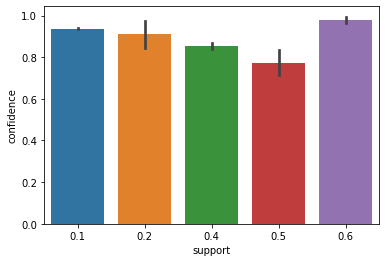

In [53]:
sns.barplot(rules.support,rules.confidence,data=data)
plt.show()

C:\Users\Sandy_Marcus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


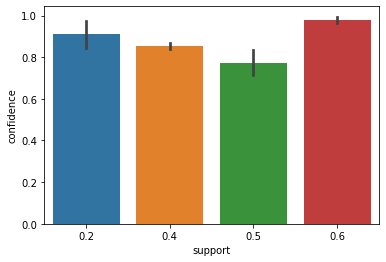

In [54]:
sns.barplot(rules1.support,rules1.confidence,data=data)
plt.show()

C:\Users\Sandy_Marcus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


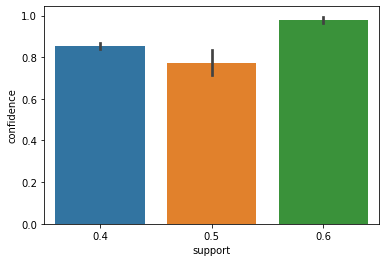

In [55]:
sns.barplot(rules2.support,rules2.confidence,data=data)
plt.show()

C:\Users\Sandy_Marcus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


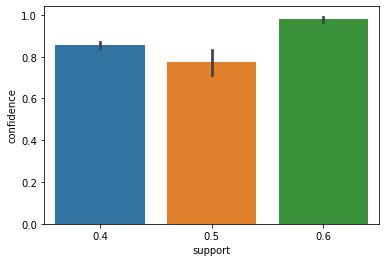

In [56]:
sns.barplot(rules3.support,rules3.confidence,data=data)
plt.show()

C:\Users\Sandy_Marcus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


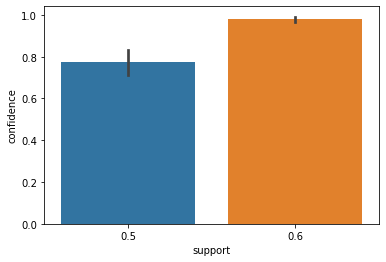

In [57]:
sns.barplot(rules4.support,rules4.confidence,data=data)
plt.show()

C:\Users\Sandy_Marcus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


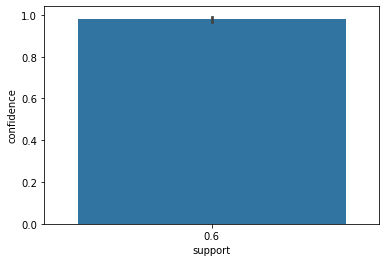

In [58]:
sns.barplot(rules5.support,rules5.confidence,data=data)
plt.show()

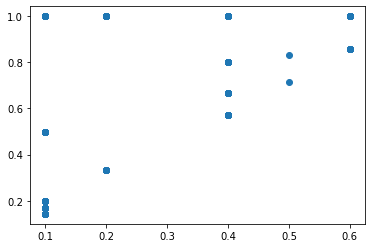

In [59]:
plt.scatter(rules.support,rules.confidence)
plt.show()

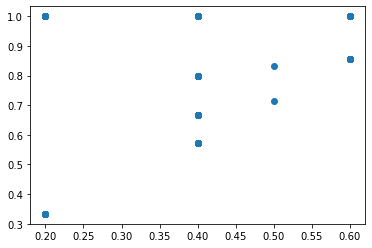

In [60]:
plt.scatter(rules1.support,rules1.confidence)
plt.show()

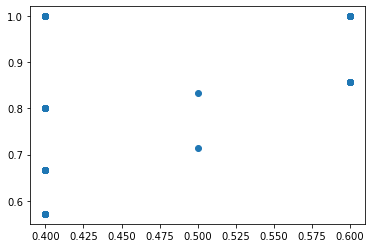

In [61]:
plt.scatter(rules2.support,rules2.confidence)
plt.show()

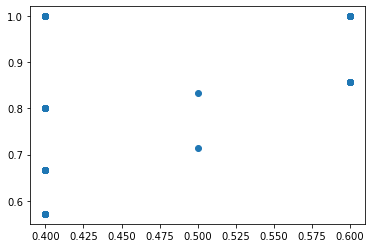

In [62]:
plt.scatter(rules3.support,rules3.confidence)
plt.show()

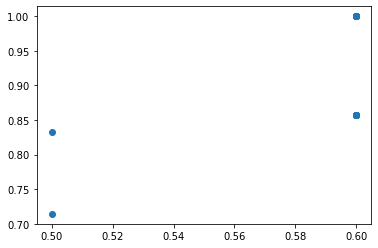

In [63]:
plt.scatter(rules4.support,rules4.confidence)
plt.show()

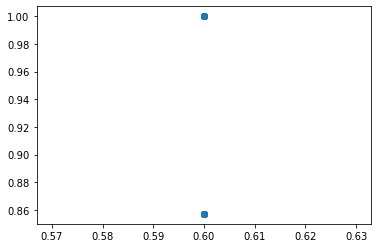

In [64]:
plt.scatter(rules5.support,rules5.confidence)
plt.show()